# Providing Input Data in OptiWindNet

This notebook demonstrates the various ways to provide input data to the `OptiWindNet` API by initializing a `WindFarmNetwork()` instance.

> **Note:** Many of the Jupyter notebooks provided include SVG figures as output. To ensure these visuals are displayed correctly in JupyterLab or Jupyter Notebook, make sure the notebook is marked as **trusted**.
> *In JupyterLab, you can do this by pressing* `Ctrl + Shift + C` *and selecting* **Trust Notebook**.

Import required modules

In [1]:
from optiwindnet.api import WindFarmNetwork, load_repository

In [2]:
# Display figures as SVG in Jupyter notebooks
%config InlineBackend.figure_formats = ['svg']

## Initialize a `WindFarmNetwrok()` instance

There are 3 alternatives to initialize `WindFarmNetwrok()` instance within **optiwindnet**:
- From raw data or a preconstructed graph
- From a `.yaml` file
- From a `.osm.pbf` file

### Option 0: From raw data or a preconstructed graph
This option is used when you already have the wind farm layout and parameters defined in a Python data structure or *networkx.Graph*.

You can directly pass either:

* A: Raw layout data via coordinates: turbinesC, substationsC, borderC, etc.,
which will be converted into a graph internally, or

* B: A prebuilt networkx.Graph via the L parameter (e.g., loaded from external sources or computed elsewhere).

#### A: Initialize via coordinates:

In [3]:
import numpy as np
# all coordinates are sequences of (x, y) pairs
# if input coordinates are in arrays X and Y, use `np.hstack((X, Y))`
borderC = np.array( # coordinate sequence defines the polygon, last-first segment implicit
    [[1951, 200], [1951, 1383], [386, 1383], [650, 708], [624, 678],
     [4, 1036], [4, 3], [1152, 3], [917, 819], [957, 854]],
    dtype=float)
obstaclesC = [
    # first obstacle
    np.array([[1540, 920], [1600, 940], [1600, 1150], [1400, 1200]]),
    # [second obstacle] ...
]
substationsC = np.array([[696, 1063],], dtype=float)
turbinesC = np.array(
    [[1940, 279], [1920, 703], [1475, 696], [1839, 1250],
     [1277, 1296], [442, 1359], [737, 435], [1060, 26],
     [522, 176], [87, 35], [184, 417], [71, 878]],
    dtype=float)
cables = [(3, 206), (5, 287), (7, 406)]

In [4]:
wfn01 = WindFarmNetwork(turbinesC=turbinesC, substationsC=substationsC, cables=cables, borderC=borderC, obstaclesC=obstaclesC)

<Axes: >

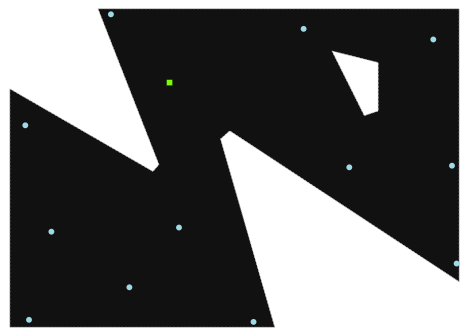

In [5]:
# plot location
wfn01.plot_location()

#### B: Initialize via the `L` parameter:

Load a prebuilt *Networkx.Graph*

> Note: the `load_repository()` functionality of `OptiWindNet` is used to load a prebuilt *Networkx.Graph* of the avaible locations. For more details on this functionality look into the notebook about [Load repositories containing location data](a03_load_repositories.ipynb).

In [6]:
locations = load_repository()
L_prebuilt = locations.seagreen


Initialize `WindFarmNetwork()` instance with the loaded `L_prebuilt`:

<Axes: >

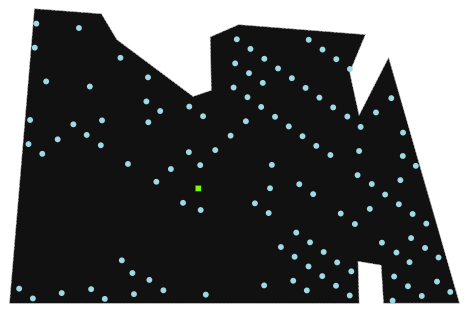

In [7]:
wfn02 = WindFarmNetwork(L=L_prebuilt, cables=7)
wfn02.plot_location()

### Option 1: From a YAML file:
This option loads the configuration from a `.yaml` file, which is useful for working with saved or external project files in this format. A sample code for generating `.yaml` files with proper structure are provided below.

In [8]:
with open('data/example_location.yaml', 'w') as yaml_file:
    yaml_file.write('''
# coordinate format can be "planar" or "latlon"
#   - for "latlon" examples, see `optiwindnet/data/*.yaml`
#   - this field is optional, default is "latlon"
#   - coordinates are converted to floats, so floats may be used as well
COORDINATE_FORMAT: planar

# extents define a polygon:
#   - do not repeat the initial vertex at the end
#   - line breaks are optional
EXTENTS: [
  [1951, 200],
  [1951, 1383],
  [386, 1383],
  [650, 708],
  [624, 678],
  [4, 1036],
  [4, 3],
  [1152, 3],
  [917, 819],
  [957, 854]
]

# obstacles is optional and must be a list of polygons (even if 1 obstacle)
OBSTACLES: [
  [  # first obstacle
    [1540, 920],
    [1600, 940],
    [1600, 1150],
    [1400, 1200],
  ],
  # [second obstacle]
]

SUBSTATIONS: [
  [696, 1063],
]

TURBINES: [
  [1940, 279],
  [1920, 703],
  [1475, 696],
  [1839, 1250],
  [1277, 1296],
  [442, 1359],
  [737, 435],
  [1060, 26],
  [522, 176],
  [87, 35],
  [184, 417],
  [71, 878],
]
''')

Initialize `WindFarmNetwork()` instance with an exisiting `.yaml` file:

In [9]:
wfn1 = WindFarmNetwork.from_yaml(filepath='data/example_location.yaml', cables=cables)

<Axes: >

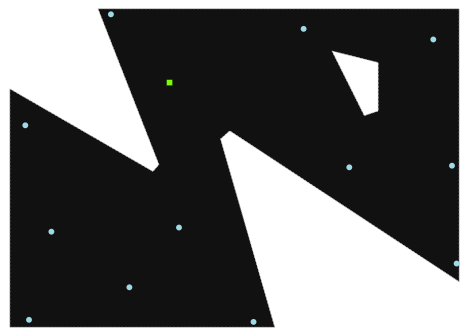

In [10]:
wfn1.plot_location()

## Option 2: From OSM.PBF input file (aka OpenStreetMap protobuffer format)

This option loads the configuration from a `.osm.pbf` file, which is useful for working with saved or external project files in this format.

>The JOSM open-source map editor is recommended if using this format: <https://josm.openstreetmap.de/>. In addition, the JOSM plugin **pbf** is required to save in the `.osm.pbf` format. The plugin **opendata** is useful for importing many common GIS file formats.
>
>The OpenStreetMaps objects used for representing a windfarm location are:
>- *nodes*
>- *ways*
>- *multipolygons* (relation between closed ways)
>
>Wind turbines are represented by *nodes* with the tag `power=generator`. Substations are represented either by *nodes* or by closed *ways* tagged `power=substation` or `power=transformer`. Substations based on *ways* will be reduced to the point at the centroid of the polygon defined by the *way*.
>
>The border of the windfarm can be a closed *way* tagged `power=plant`. If obstacles are required, then the closed *way* for the border must be combined with the closed *ways* for the obstacles in a *multipolygon* with the tag `power=plant` (in which case the *ways* themselves should not be tagged).
>
>See `optiwindnet/data/*.osm.pbf` for more examples.

Initialize `WindFarmNetwork()` instance with an existing `.osm.pbf` file:

In [11]:
wfn2 = WindFarmNetwork.from_pbf('data/example_location.osm.pbf', cables=cables)

<Axes: >

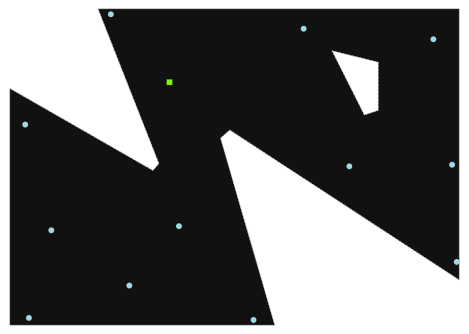

In [12]:
wfn2.plot_location()